**Exercise**

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

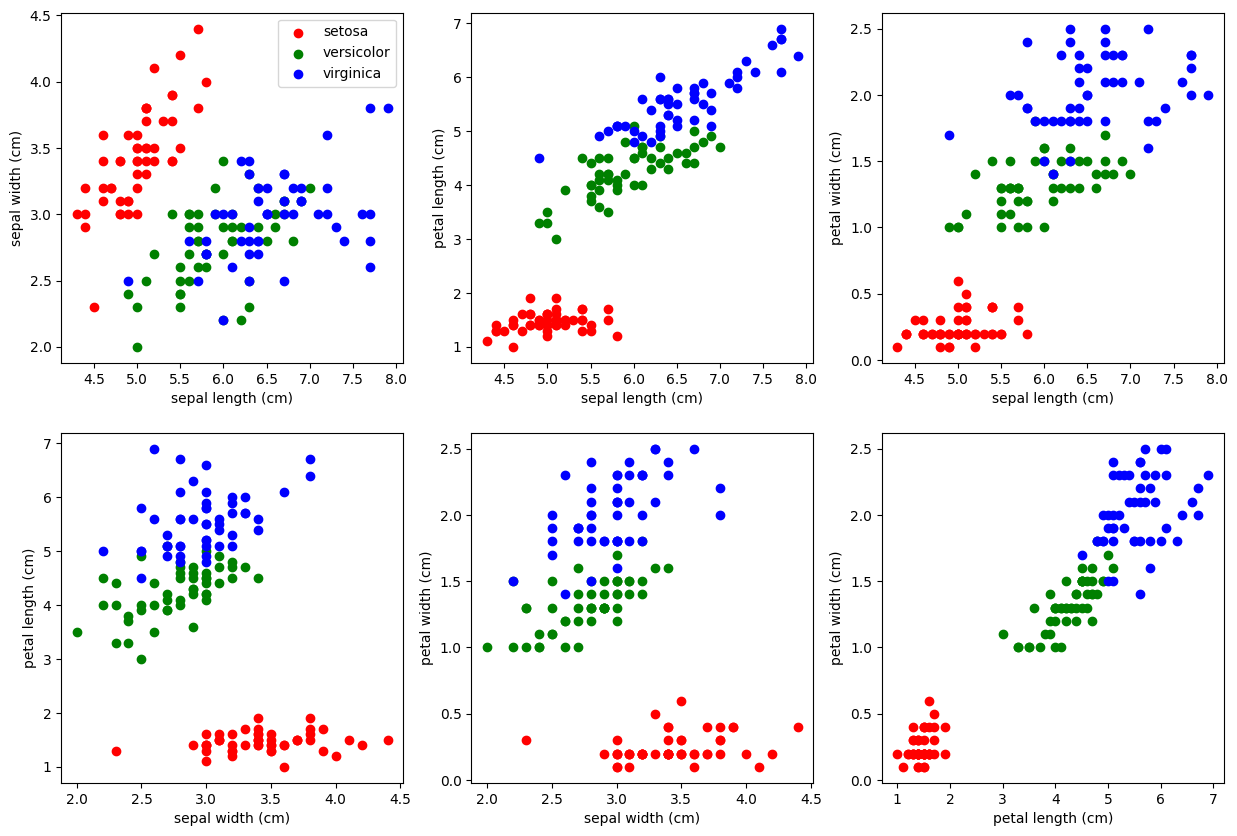

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#t0 = np.where(iris.target==0)

data = np.asarray(iris.data)
t0 = np.where(np.asarray(iris.target)==0)
t1 = np.where(np.asarray(iris.target)==1)
t2 = np.where(np.asarray(iris.target)==2)

fig, axs = plt.subplots(2,3,figsize=(15,10))
ii,jj = 0,0
for i in range(4):
    for j in range(1+i,4):
        axs[ii,jj].scatter(data[t0,i],data[t0,j],c="r",label=iris.target_names[0])
        axs[ii,jj].scatter(data[t1,i],data[t1,j],c="g",label=iris.target_names[1])
        axs[ii,jj].scatter(data[t2,i],data[t2,j],c="b",label=iris.target_names[2])
        axs[ii,jj].set_xlabel(iris.feature_names[i])
        axs[ii,jj].set_ylabel(iris.feature_names[j])
        if jj!=2: jj+=1
        else:
            ii+=1
            jj=0
axs[0,0].legend()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [50]:
mod.score(X_test,y_test)

1.0

<AxesSubplot: >

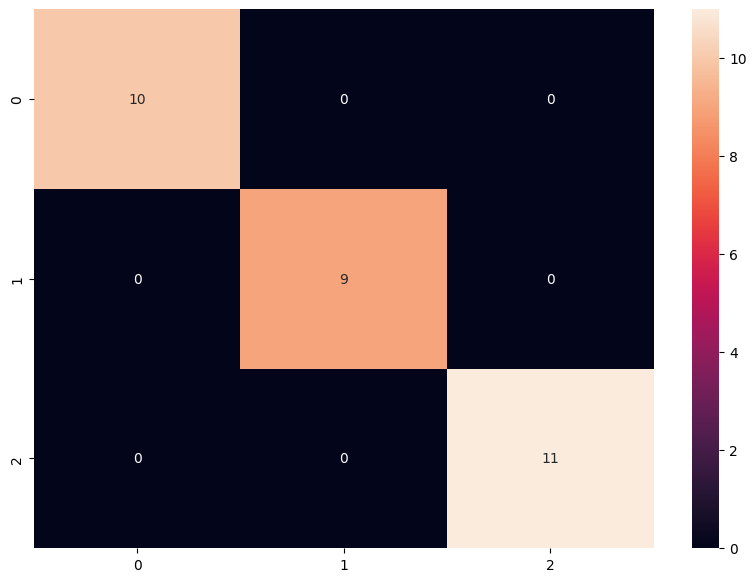

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,mod.predict(X_test))

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)